In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
from mpl_toolkits import mplot3d
from matplotlib import rcParams
import copy
import math

In [ ]:
class surface:
  def __init__( self, equation ):
    self.equation = equation

  def get_equation():
    return self.equation;

  def get_equation_eval( x, y ):
    return self.equation( x, y )

**equation_2d:**
$$
1=\frac{x^2}{a^2}+\frac{y^2}{b^2}
$$$$
y=\pm\sqrt{b^2-\left(\frac{xb}{a}\right)^2}
$$

**get_position_incidence_2d:**

In [ ]:
class lens_ellipse_circular( surface ):
  def __init__( self, a, b ):
    super().__init__( self.equation_3d )
    self.a = a
    self.b = b

  def equation_2d( self, r ):
    return ( self.b**2 - ( r*self.b/self.a )**2 )**(1/2)

  def equation_3d( self, x, y ):
    r = ( x**2 + y**2 )**(1/2)
    return self.equation_2d( r )

  def get_position_incidence_2d( self, photon_yIntercept, photon_slope ):
    x = ( -photon_slope * photon_yIntercept + self.b * ( photon_slope**2 + self.b**2/self.a**2 - photon_yIntercept**2/self.a**2 )**(1/2) ) / ( photon_slope**2 + self.b**2/self.a**2 )
    y = self.equation_2d( x )
    return ( x, y )

  def get_position_incidence_3d( self, photon_position, photon_direction ):
    # rz-plane where r2=x2+y2
    r_photon_direction = ( photon_direction[ 0 ]**2 + photon_direction[ 1 ]**2 )**(1/2)
    z_photon_direction = photon_direction[ 2 ]
    photon_slope = z_photon_direction / r_photon_direction

    r_photon_position = ( photon_position[ 0 ]**2 + photon_position[ 1 ]**2 )**(1/2)
    z_photon_position = photon_position[ 0 ]
    photon_yIntercept = z_photon_position - photon_slope * r_photon_position

    ( r_incidence, z ) = self.get_position_incidence_2d( photon_yIntercept, photon_slope )

    # xy-plane
    photon_slope = photon_direction[ 1 ] / photon_direction[ 0 ] # redefinition of xy-slope
    photon_yIntercept = photon_position[ 1 ] - photon_slope * photon_position[ 1 ]
    x = ( -photon_slope * photon_yIntercept + ( -photon_slope**2 * r_incidence**2 - photon_yIntercept**2 + r_incidence**2 )**(1/2) ) / ( photon_slope**2 + 1 )
    y = ( r_incidence**2 - x**2 )**(1/2)

    return ( x, y, z )

  def get_angle_incidence( self, photon_position, photon_direction ):
    ( x, y, z ) = self.get_position_incidence_3d( photon_position, photon_direction )
    return math.acos( ( x * photon_direction[ 0 ] + y * photon_direction[ 1 ] + z * photon_direction[ 2 ] ) / ( ( x**2 + y**2 + z**2 )**(1/2) * ( photon_direction[ 0 ]**2 + photon_direction[ 1 ]**2 + photon_direction[ 2 ]**2 )**(1/2) ) )

In [ ]:
def get_reflection_s( n_1, n_2, theta_i ):
  cos_theta_i = math.cos( theta_i )
  sin_theta_i = math.sin( theta_i )
  numerator   = n_1 * cos_theta_i - n_2 * math.sqrt( 1 - ( n_1 / n_2 * sin_theta_i ) ** 2 )
  denominator = n_1 * cos_theta_i + n_2 * math.sqrt( 1 - ( n_1 / n_2 * sin_theta_i ) ** 2 )
  return ( numerator / denominator ) ** 2

def get_reflection_p( n_1, n_2, theta_i ):
  cos_theta_i = math.cos( theta_i )
  sin_theta_i = math.sin( theta_i )
  numerator   = n_1 * ( 1 - ( n_1 / n_2 * sin_theta_i )**2 )**(1/2) - n_2 * cos_theta_i
  denominator = n_1 * ( 1 - ( n_1 / n_2 * sin_theta_i )**2 )**(1/2) + n_2 * cos_theta_i
  return ( numerator / denominator ) ** 2

def get_reflection( n_1, n_2, theta_i, spRatio=1 ): # spRatio = 1 for natural light
  return spRatio * get_reflection_s( n_1, n_2, theta_i ) / get_reflection_p( n_1, n_2, theta_i )

class lens:
  def __init__( self, position, direction, surface_1, surface_2 ):
    self.position = position
    self.direction = direction
    self.surface_1 = surface_1
    self.surface_2 = surface_2
  
  def get_position( self ):
    return self.position

  def get_direction( self ):
    return self.direction

  def get_surface_1( self ):
    return self.surface_1;
  
  def get_surface_2( self ):
    return self.surface_2;

  def get_position_incidence_surface_1( self, photon_position, photo_direction ):
    return surface_1.get_position_incidence_3d( photon_position, photo_direction )

  def get_angle_reflection_surface_1( self, indexRefraction_1, indexRefraction_2, angle_incidence ):
    return get_reflection( indexRefraction_1, indexRefraction_2, angle_incidence, 1 )
  
  def get_angle_reflection_surface_1( self, photon_position, photon_direction ):
    return "here"

  def get_angle_incidence_surface_1( self, photon_position, photo_direction ):
    return "here"
  
  def get_angle_refraction( self, angle_incidence ):
    return "here"

<ipython-input-3-74687c5b56cf>:8: RuntimeWarning: invalid value encountered in sqrt
  return ( self.b**2 - ( r*self.b/self.a )**2 )**(1/2)


Text(0.5, 1.0, 'normal ellipse: a=10, b=1')

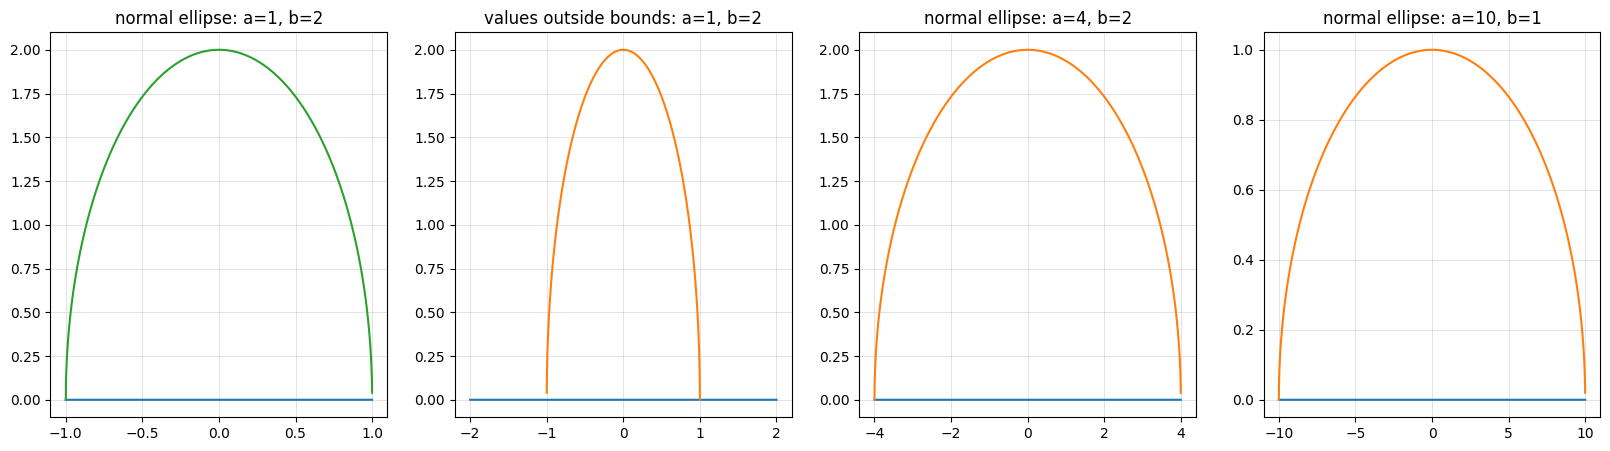

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# normal ellipse
a = 1
b = 2
lens = lens_ellipse_circular( a, b )
r = np.arange(-a, a, 2*a/10000)
z = np.arange(0,b,200)
axs[0].plot(r, np.zeros_like(r))
axs[0].plot(np.zeros_like(z), z )
axs[0].plot(r, lens.equation_2d(r))
axs[0].grid(which='major', linewidth=0.5, alpha=0.5)
axs[0].set_title('normal ellipse: a='+str(a)+', b='+str(b))

# Giving values outside ellipse
a = 1
b = 2
lens = lens_ellipse_circular( a, b )
r = np.arange(-2*a, 2*a, 2*a/10000)
axs[1].plot(r, np.zeros_like(r))
axs[1].plot(r, lens.equation_2d(r))
axs[1].grid(which='major', linewidth=0.5, alpha=0.5)
axs[1].set_title('values outside bounds: a='+str(a)+', b='+str(b))

# normal ellipse
a = 4
b = 2
lens = lens_ellipse_circular( a, b )
r = np.arange(-a, a, 2*a/10000)
axs[2].plot(r, np.zeros_like(r))
axs[2].plot(r, lens.equation_2d(r))
axs[2].grid(which='major', linewidth=0.5, alpha=0.5)
axs[2].set_title('normal ellipse: a='+str(a)+', b='+str(b))

# normal ellipse
a = 10
b = 1
lens = lens_ellipse_circular( a, b )
r = np.arange(-a, a, 2*a/10000)
axs[3].plot(r, np.zeros_like(r))
axs[3].plot(r, lens.equation_2d(r))
axs[3].grid(which='major', linewidth=0.5, alpha=0.5)
axs[3].set_title('normal ellipse: a='+str(a)+', b='+str(b))

2.8061435962888637


<ipython-input-3-74687c5b56cf>:8: RuntimeWarning: invalid value encountered in sqrt
  return ( self.b**2 - ( r*self.b/self.a )**2 )**(1/2)


Text(0.5, 1.0, 'normal ellipse: a=10, b=1')

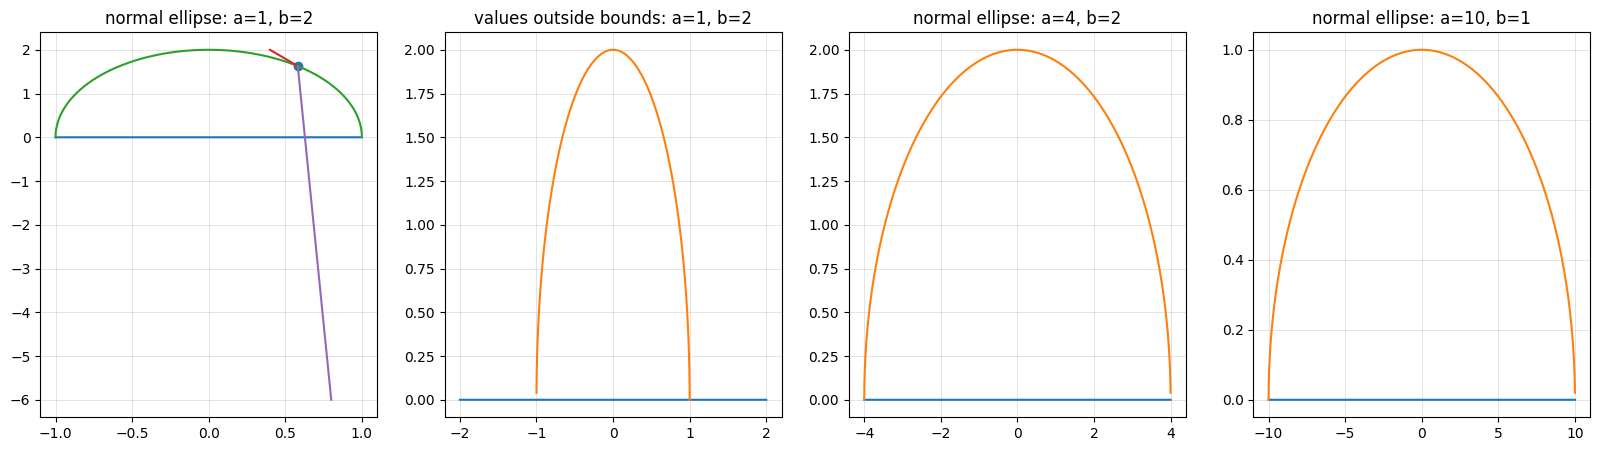

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# normal ellipse
a = 1
b = 2
lens = lens_ellipse_circular( a, b )
r = np.arange(-a, a, 2*a/10000)
z = np.arange(0,b,200)
axs[0].plot(r, np.zeros_like(r))
axs[0].plot(np.zeros_like(z), z )
axs[0].plot(r, lens.equation_2d(r))

photon_yIntercept = 10
photon_slope = -20
x_start = 0.4
point = lens.get_position_incidence_2d(photon_yIntercept,photon_slope)
axs[0].scatter(point[0], point[1])
x = [x_start,point[0]]
y = [x_start*photon_slope+photon_yIntercept,point[1]]
axs[0].plot(x,y)

print( lens.get_angle_incidence( (x[0],0,y[0]), (1,0,photon_slope) ) )
x_stop = 0.8
x = [point[0],x_stop]
y = [point[1],x_stop*photon_slope+photon_yIntercept]
axs[0].plot(x,y)

axs[0].grid(which='major', linewidth=0.5, alpha=0.5)
axs[0].set_title('normal ellipse: a='+str(a)+', b='+str(b))

# Giving values outside ellipse
a = 1
b = 2
lens = lens_ellipse_circular( a, b )
r = np.arange(-2*a, 2*a, 2*a/10000)
axs[1].plot(r, np.zeros_like(r))
axs[1].plot(r, lens.equation_2d(r))
axs[1].grid(which='major', linewidth=0.5, alpha=0.5)
axs[1].set_title('values outside bounds: a='+str(a)+', b='+str(b))

# normal ellipse
a = 4
b = 2
lens = lens_ellipse_circular( a, b )
r = np.arange(-a, a, 2*a/10000)
axs[2].plot(r, np.zeros_like(r))
axs[2].plot(r, lens.equation_2d(r))
axs[2].grid(which='major', linewidth=0.5, alpha=0.5)
axs[2].set_title('normal ellipse: a='+str(a)+', b='+str(b))

# normal ellipse
a = 10
b = 1
lens = lens_ellipse_circular( a, b )
r = np.arange(-a, a, 2*a/10000)
axs[3].plot(r, np.zeros_like(r))
axs[3].plot(r, lens.equation_2d(r))
axs[3].grid(which='major', linewidth=0.5, alpha=0.5)
axs[3].set_title('normal ellipse: a='+str(a)+', b='+str(b))

<ipython-input-3-74687c5b56cf>:8: RuntimeWarning: invalid value encountered in sqrt
  return ( self.b**2 - ( r*self.b/self.a )**2 )**(1/2)


Text(0.5, 1.0, 'normal ellipse: a=10, b=1')

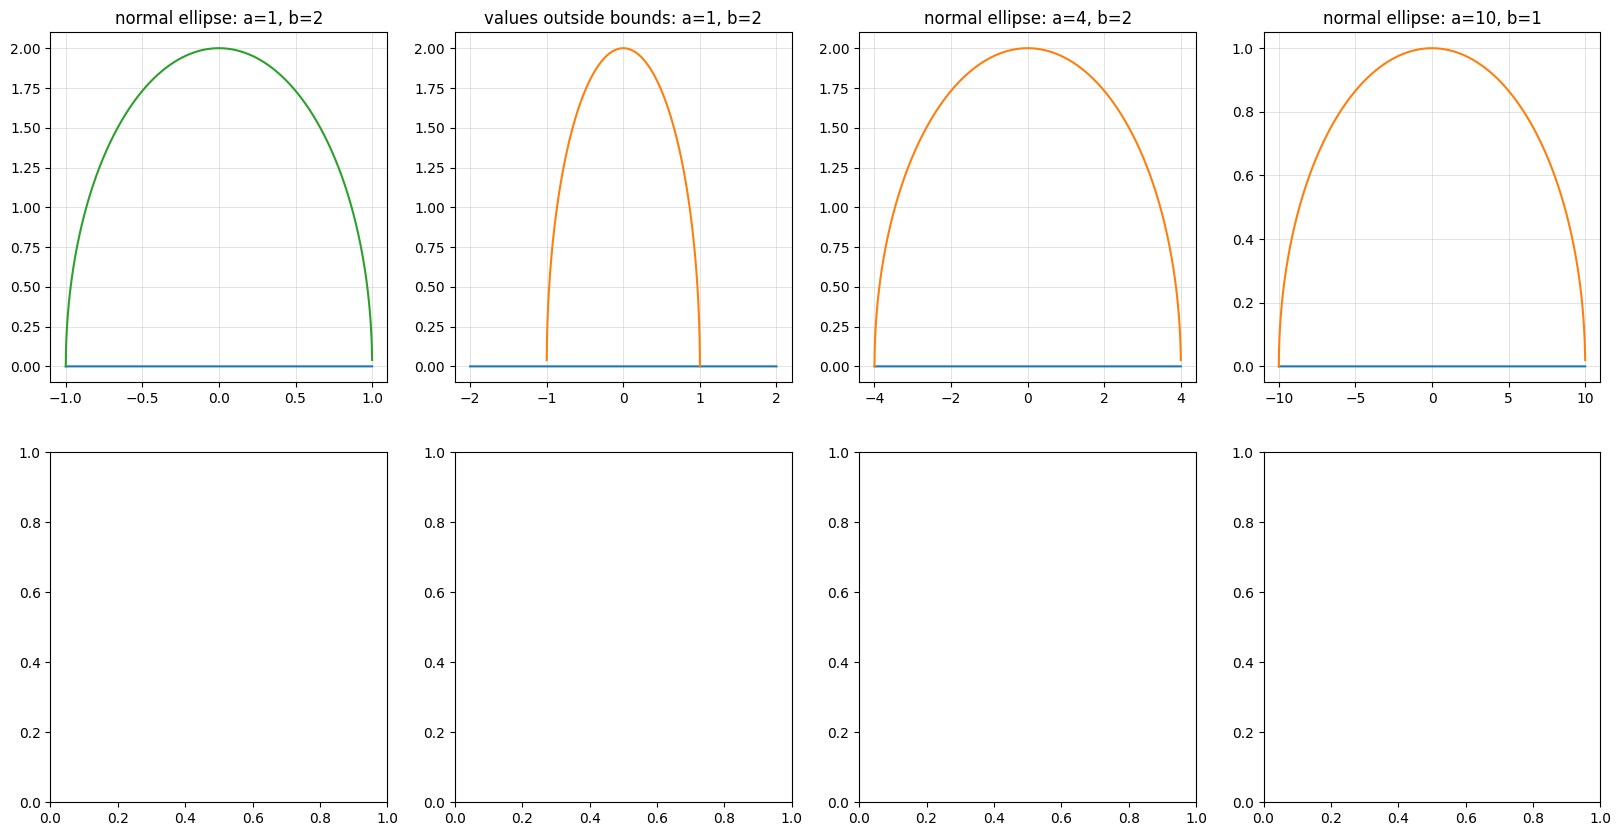

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# normal ellipse
a = 1
b = 2
lens = lens_ellipse_circular( a, b )
r = np.arange(-a, a, 2*a/10000)
z = np.arange(0,b,200)
axs[0,0].plot(r, np.zeros_like(r))
axs[0,0].plot(np.zeros_like(z), z )
axs[0,0].plot(r, lens.equation_2d(r))
axs[0,0].grid(which='major', linewidth=0.5, alpha=0.5)
axs[0,0].set_title('normal ellipse: a='+str(a)+', b='+str(b))

# Giving values outside ellipse
a = 1
b = 2
lens = lens_ellipse_circular( a, b )
r = np.arange(-2*a, 2*a, 2*a/10000)
axs[0,1].plot(r, np.zeros_like(r))
axs[0,1].plot(r, lens.equation_2d(r))
axs[0,1].grid(which='major', linewidth=0.5, alpha=0.5)
axs[0,1].set_title('values outside bounds: a='+str(a)+', b='+str(b))

# normal ellipse
a = 4
b = 2
lens = lens_ellipse_circular( a, b )
r = np.arange(-a, a, 2*a/10000)
axs[0,2].plot(r, np.zeros_like(r))
axs[0,2].plot(r, lens.equation_2d(r))
axs[0,2].grid(which='major', linewidth=0.5, alpha=0.5)
axs[0,2].set_title('normal ellipse: a='+str(a)+', b='+str(b))

# normal ellipse
a = 10
b = 1
lens = lens_ellipse_circular( a, b )
r = np.arange(-a, a, 2*a/10000)
axs[0,3].plot(r, np.zeros_like(r))
axs[0,3].plot(r, lens.equation_2d(r))
axs[0,3].grid(which='major', linewidth=0.5, alpha=0.5)
axs[0,3].set_title('normal ellipse: a='+str(a)+', b='+str(b))

# # normal ellipse - 3D
# a = 10
# b = 1
# lens = lens_ellipse_circular( a, b )
# x = np.arange(-a, a, 2*a/10)
# y = np.arange(-a, a, 2*a/10)
# z = np.zeros_like(r)
# for x_cur, y_cur, i in zip(x, y, range(len(x))):
#   if lens.equation_3d( x_cur, y_cur ) > 0: z[ i ] = lens.equation_3d( x_cur, y_cur )
#   else:                                    z[ i ] = 0
# axs[1,0] = fig.add_subplot(2, 1, 2, projection='3d')
# axs[1,0].plot_surface(x,y,z)